In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [102]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [103]:
print(data)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


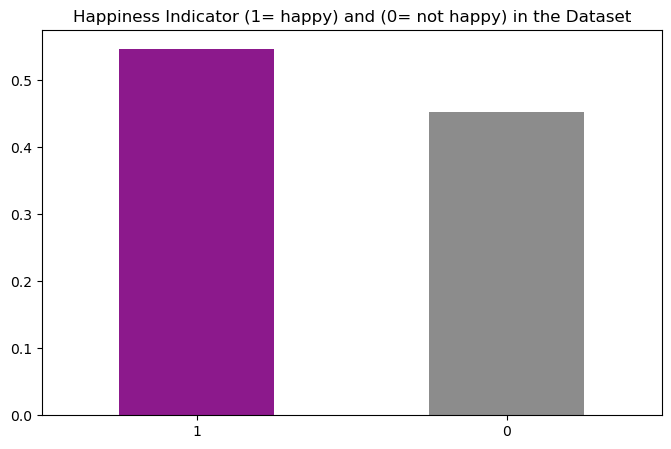

In [104]:
# Look at overall happiness in the dataset by plotting 0 and 1 values of Y

fig = plt.figure(figsize = (8,5))
data.Y.value_counts(normalize = True).plot(kind='bar', color= ['purple','grey'], alpha = 0.9, rot=0)
plt.title('Happiness Indicator (1= happy) and (0= not happy) in the Dataset')
plt.show()

In [105]:
# split the data into features and target
x = data[["X1", "X2", "X3", "X4", "X5", "X6"]]
y = data["Y"]

In [106]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(x, y)
print(model)


LogisticRegression()


In [107]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy: ", model.score(X_test, Y_test))

Accuracy:  0.5769230769230769


In [108]:
# we see that the logistic regression model has only 0.423 model accuracy... let's try another model
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

# Train a decision tree model on the training data
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy: ", model.score(X_test, Y_test))


Accuracy:  0.6923076923076923


In [109]:
# we see that the decision tree model is slightly better (accuracy 0.576) but not good enough... try a support vector model?
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

# Train a decision tree model on the training data
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy: ", model.score(X_test, Y_test))

Accuracy:  0.5


In [113]:
# the support vector model (accuracy = 0.538) is even worse than the decision tree.. what to do??
# try recursive feature slection 
# Define the target variable and the features
target = data["Y"]
features = data.drop("Y", axis = 1)

In [115]:
# Train a decision tree model using all of the features
model = DecisionTreeClassifier()
model.fit(features, target)


DecisionTreeClassifier()

In [117]:
from sklearn.feature_selection import RFE
# Perform recursive feature elimination
rfe = RFE(model, n_features_to_select = len(features.columns))
rfe = rfe.fit(features, target)

# Print the final set of features
print(rfe.support_)

[ True  True  True  True  True  True]


In [118]:
# Check the accuracy of the model
accuracy = rfe.score(features, target)

# Print the accuracy
print(accuracy)

0.9444444444444444


In [121]:
# YAAAAY cool!!!! Seems like recursive feature elimination works well; this recursive algorithm trains the model 
#with all features, then removes the least important feature and trains the model again. 
#but which were the best features?
# Print the ranking of the features
ranking = sorted(range(len(rfe.support_)), key=lambda x: rfe.support_[x])
print(ranking)

[0, 1, 2, 3, 4, 5]


In [ ]:
# emmmm... all the features were important?! none of the variables had been removed 
#in order to make the model more accurate. #confused